# Design of Heat Pumps
&nbsp;  

The following design procedure will establish clear design specifications for how to properly size the heat pumps needed in a variety of situations. For the simplicity of the user the input parameters which help properly model the system will be provided by him/her in the very beginning - Section 1: Input parameters. The functions and formulas will be provided in the second portion - Section 2: Formulas and Functions. Section 3: Results - will be focusing on the implementation of the parameters, design conditions, etc. implemented in the previous sections. In Section 4: Design insight - the user can find any additional considerations, assumptions made, limitations of the design procedure, reference models and studies.
<br/><br/>
Section 1: Input parameters
<br/><br/>
Section 2: Formulas and Functions
<br/><br/>
Section 3: Results
<br/><br/>
Section 4: Design insight
<br/><br/>

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Input Parameters

In [34]:
import math
import numpy as np
import plotly as pl
import plotly.graph_objects as go
import seaborn
import pandas
import matplotlib.pyplot as plt

# (&nbsp;  )

In [48]:
# temperature parameters, these are the user's choice of input parameters and can be changed

T_out = 2 + 273 
T_sup = 45 + 273
COP_nominal = 3.2

# water/refrigerant parameters, associated with the properties of the refrigerant

# the density of the liquid [kg/m3]
p = 1000

# the volumetric flow rate [m3/s], always make sure that the volumetric flow rate is given in m3/s, not in 
# l/s which might cause orders of magnitude of difference
qf = 0.2e-3

# the volumetric discharge flow rate [m3/s], which accounts for how fast does the consumption of heated 
# water occurs
qf_discharge = 0.13e-3

# the specific heat capacity [kJ/(kg*K)]
# 4.186 is the value of water [kJ/(kg*K)]
Cp = 4.186

# change of temperature [K]
delta_T = 55 - 10

# the next parameter cd is related to typical efficiency drop from operating on partial load
cd = 0.9

# the electric resistance of the system
Q_charge = 5

# The volume of the temperature storage system - usual value for a small family of three
Vts = 180e-3

&nbsp;  
Here we have a reference table about specific flow values and their corresponding supply temperatures. However there are other sources of reference data and sensible design input from the user are always required. The usage of said values and the assumptions made along the way have to correspond to the specific situation and take into account a multitude of factors - THIS IS THE ENGINEERS' CHOICE!  
<br/><br/>

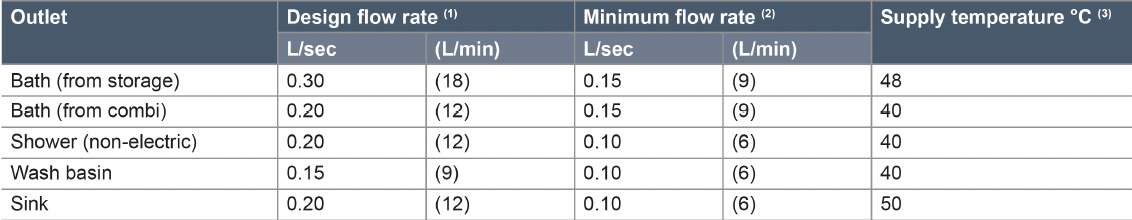

## Formulas and Functions 

In [49]:
# This function returns the ideal Coefficient of Performance (COP) of the system based on T_out - the 
# outside temperature and T_sup the supplied temperature for the REFRIGERANT in the system
# the units of T_out and T_sup should both be in degrees Kelvin [K].

def return_COP_ideal(T_out, T_sup):
    return 1 / (1 - T_out/T_sup)

# This function returns the nominal efficiency of the system ni_nominal - based on the ideal COP, and the
# actual (nominal) COP - COP_nominal which is provided in the input data.
# This has to be in line with what we discussed about the difference between real and ideal COP - usually
# in the range of 0.40 to 0.55.
# We can usually assume that the ni_nominal efficiency of the system will remain constant throughtout diff
# temperatures, which might have to be changed if we want a more precise model

def return_efficiency_ni_nominal(COP_ideal):
    return COP_nominal / return_COP_ideal(T_out, T_sup)

# To account for the consumer profile we need an indicator for the load factor. The ratio between the
# nominal power that we would expect for the temperature differences we have the load factor CR is
# used.

def return_CR(nominal_power, actual_power):
    return nominal_power/actual_power

# This function calculated the actual COP_CR after applying ni_nominal to the ideal COP
def return_COP_CR(COP_CR_1):
    return COP_CR_1 * return_CR(nominal_power=1, actual_power=1)/(0.9 * return_CR(nominal_power=1, actual_power=1) + 0.1)

# Hot water calculation, use typical flow rates and the heat transfer equation [kW].
def return_heat_peak_Q(p, qf, Cp, delta_T):
    return p * qf * Cp * delta_T

# This function related the volume of a typical storage unit to electric resistance of the system [s]
def return_time_to_charge_t_charge(p, Vts, Cp, delta_T, Q_electric):
    return p * Vts * Cp * delta_T / Q_electric

# This function returns the time needed to discharge the temperature storage unit
def return_time_to_discharge_t_discharge(Vts, qf_discharge):
    return Vts/qf_discharge

## Results

In [37]:
temperature_range = np.linspace(T_out - 273, T_sup - 273, T_sup - T_out + 1)

print(temperature_range)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40. 41. 42. 43. 44. 45.]


In [38]:
COP_ideal = return_COP_ideal(T_out, T_sup)

COP_ideal_for_different_temperatures = np.zeros((len(temperature_range), 1))
COP_CR_for_different_temperatures = np.zeros((len(temperature_range), 1))
ni_nominal = return_efficiency_ni_nominal(COP_ideal)


for i in range(len(temperature_range) - 1):
    T_out_current = temperature_range[i] + 273
    COP_ideal_for_different_temperatures[i] = np.around(return_COP_ideal(T_out_current, T_sup), 3)
    COP_CR_for_different_temperatures[i] = np.around((COP_ideal_for_different_temperatures[i] * ni_nominal), 3)


# print(COP_ideal_for_different_temperatures)
# print(COP_CR_for_different_temperatures)

# table the temperature, the ideal COP and the nominal COP_CR
fig = go.Figure(data=[go.Table(header=dict(values=['Temperature T[Celsius]', 'COP_ideal', 'COP_CR']),
                 cells=dict(values=[temperature_range, COP_ideal_for_different_temperatures, COP_CR_for_different_temperatures]))
                     ])
fig.show()

### EXAMPLE on Storage and operation in parallel
&nbsp;  
The following example will take a look of the working and design mechanism for a heat pump working together with other energy supplying systems and storage. In particular we will focus on a flat that has Heating and Domestic hot water demand (DHW).
<br/><br/>

In [39]:
Q_shower = return_heat_peak_Q(p, qf, Cp, delta_T)
print(f"The peak heat demand of a shower can be calculated as {Q_shower} [kW].")

The peak heat demand of a shower can be calculated as 37.674 [kW].


<br></br>
If we have a heating demand of lets say 5 kW for the entire space, we have a peak heat demand of 5 + Q_shower, for a very small portion of the day - meaning there is no point to design the HP such that it can meet this entire demand, especially since 5 kW would usually be below 15% of (5 + Q_shower), stopping the HP entirely from working in low heat demand regime. 
<br></br>

In [47]:

t_charge = return_time_to_charge_t_charge(p, Vts, Cp, delta_T, Q_charge)
print(f"The time needed to charge this particular system {t_charge} [s].")


The time needed to charge this particular system 6781.32 [s].


In [53]:
t_discharge = return_time_to_discharge_t_discharge(Vts, qf_discharge=0.13e-3)
print(f"The discharge time of the system if we have a temperature storage unit of volume V = 180l {t_discharge:.2f} [s].")

The discharge time of the system if we have a temperature storage unit of volume V = 180l 1384.62 [s].
